My market research

I want to know what services are people running in the bellow countries and at what rate. The purpose is to draw correct boundries and take informed decisons over how best I could setup a service rate accordig to the country. 


In [105]:
import pandas as pd
import seaborn as sns 
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, to_rgb
from matplotlib import cm
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import matplotlib.colors as colors
from sklearn.preprocessing import LabelEncoder
import numpy as np
import statistics
import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import datetime
import datetime as dt
import time
import django.template.backends.jinja2


cmap = sns.diverging_palette(220, 15, as_cmap=True)

In [106]:

c='h.csv'
cohort=pd.read_csv(c, encoding=('ISO-8859-1'), low_memory=False)
print(cohort.head(5))

       Date         Domain  Domain_code  Service_price Country   Country_code
0  6/6/2018  BI_consultant          117             85      Ger           303
1  6/3/2018  BI_consultant          117            119      Ger           303
2  6/6/2018  Py_automation          101             30      Ger           303
3  6/6/2018   Marketing_DA          104             65      Ger           303
4  6/6/2018   Excel_Expert          102             29      Ger           303


What is the average service rate for the domains below?

In [107]:
# contingency price table

hourly=['Domain', 'Country ']
cm=sns.color_palette='PuBu'
round(pd.crosstab(cohort[hourly[0]], cohort[hourly[1]], values=cohort['Service_price'], aggfunc='mean'),2).fillna(0).style.background_gradient(cmap=cm)


Country,Australia,Belgium,Fra,Ger,Luxembourg,Neth,Romania
Domain,,,,,,,
BA,55.000000,73.750000,0.000000,0.000000,0.000000,0.000000,0.000000
BI_Architect,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000
BI_VBA,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000
BI_consultant,71.670000,65.750000,53.750000,71.140000,78.330000,59.500000,52.750000
DA,51.000000,51.250000,45.570000,70.500000,48.250000,50.000000,34.000000
DA_Architect,0.000000,0.000000,0.000000,0.000000,125.000000,0.000000,0.000000
DA_Conversion_R,0.000000,0.000000,0.000000,55.000000,0.000000,0.000000,0.000000
DA_Excel,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000
DA_Scraping,0.000000,0.000000,0.000000,50.000000,35.000000,0.000000,0.000000


How many jobs per domain in these countries?

In [108]:
#contingency no.of.jobs table 

hourly=['Domain', 'Country ']
cm=sns.colormap='Blues'
pd.crosstab(cohort[hourly[0]], cohort[hourly[1]], values=cohort['Service_price'], margins=True, aggfunc='count').fillna(0).style.background_gradient(cmap=cm)

Country,Australia,Belgium,Fra,Ger,Luxembourg,Neth,Romania,All
Domain,,,,,,,,
BA,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5
BI_Architect,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1
BI_VBA,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1
BI_consultant,12.000000,12.000000,8.000000,7.000000,3.000000,10.000000,4.000000,56
DA,5.000000,4.000000,7.000000,4.000000,4.000000,6.000000,5.000000,35
DA_Architect,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1
DA_Conversion_R,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1
DA_Excel,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1
DA_Scraping,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2


In [109]:
#contingency no.of.jobs table 
Germany=cohort[cohort.Country_code==303] 

#contingency no.of.jobs table 

germany=['Domain', 'Country ']
cm=sns.colormap='BuGn'
pd.crosstab(Germany[germany[0]], Germany[germany[1]], values=Germany['Service_price'], aggfunc='mean', margins=True).fillna(0).style.background_gradient(cmap=cm)

Country,Ger,All
Domain,,
BI_Architect,60.000000,60.000000
BI_VBA,30.000000,30.000000
BI_consultant,71.142857,71.142857
DA,70.500000,70.500000
DA_Conversion_R,55.000000,55.000000
DA_Scraping,50.000000,50.000000
Data_Science,100.000000,100.000000
Excel_Expert,29.000000,29.000000
Marketing_DA,80.000000,80.000000


In [110]:
Belgium=cohort[cohort.Country_code==300] 

belgeium=['Domain', 'Country ']
cm=sns.colormap='BuGn'
pd.crosstab(Belgium[belgeium[0]], Belgium[belgeium[1]], values=Belgium['Service_price'], aggfunc='mean', margins=True).fillna(0).style.background_gradient(cmap=cm)

Country,Belgium,All
Domain,,
BA,73.750000,73.750000
BI_consultant,65.750000,65.750000
DA,51.250000,51.250000
Data_Science,75.000000,75.000000
Data_visualization,53.333333,53.333333
All,64.384615,64.384615


In [111]:
Australia=cohort[cohort.Country_code==320] 

australia=['Domain', 'Country ']
cm=sns.colormap='BuGn'
pd.crosstab(Australia[australia[0]], Australia[australia[1]], values=Australia['Service_price'], aggfunc='mean', margins=True).fillna(0).style.background_gradient(cmap=cm)

Country,Australia,All
Domain,,
BA,55.000000,55.000000
BI_consultant,71.666667,71.666667
DA,51.000000,51.000000
Data_Science,71.250000,71.250000
Data_visualization,41.666667,41.666667
All,63.200000,63.200000


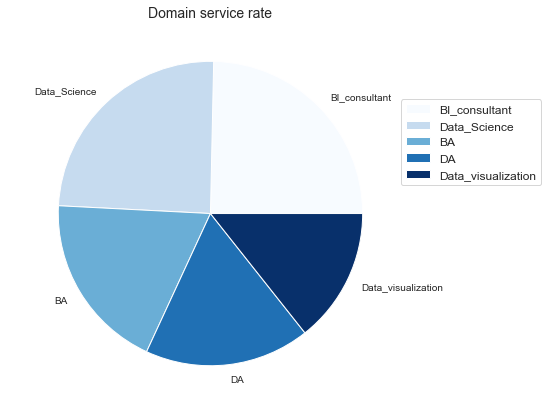

In [114]:
sns.set_style("whitegrid")
df = Australia.groupby('Domain').agg({'Service_price': 'mean'}).sort_values('Service_price', ascending=False)


ax = df.plot.pie(y='Service_price', figsize=(7, 7), colormap='Blues')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.0, 0.8), loc=2, borderaxespad=0., fontsize=12)
plt.ylabel(' ')
plt.title('Domain service rate', fontsize=14)
plt.show()

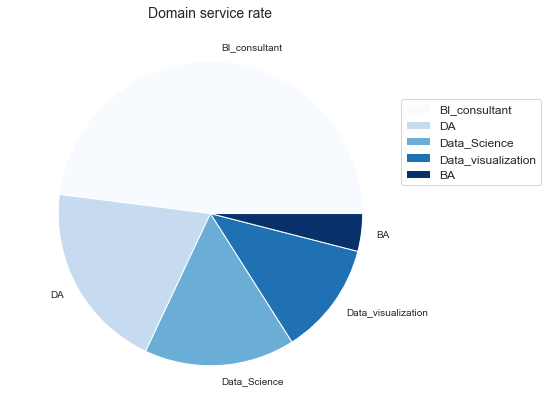

In [115]:
sns.set_style("whitegrid")
df = Australia.groupby('Domain').agg({'Service_price': 'count'}).sort_values('Service_price', ascending=False)


ax = df.plot.pie(y='Service_price', figsize=(7, 7), colormap='Blues')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.0, 0.8), loc=2, borderaxespad=0., fontsize=12)
plt.ylabel(' ')
plt.title('Domain service rate', fontsize=14)
plt.show()

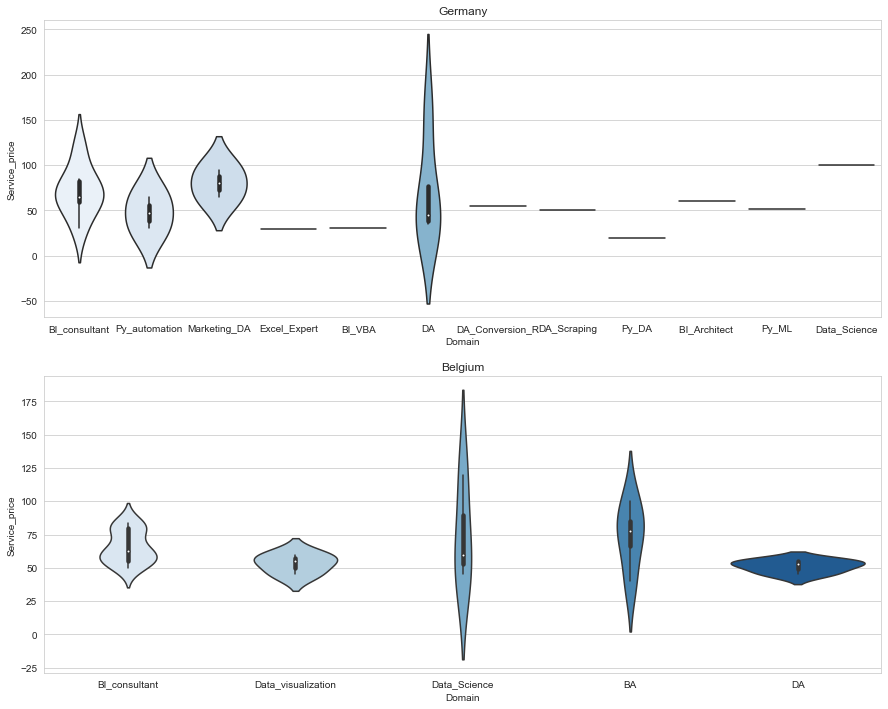

In [80]:
#violin
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=2, figsize=(15, 12), sharex=False)

sns.violinplot(x=Germany["Domain"], y=Germany["Service_price"], palette="Blues", ax=axes[0]).set_title('Germany')
sns.violinplot(x=Belgium["Domain"], y=Belgium["Service_price"], palette="Blues", ax=axes[1]).set_title('Belgium')
plt.show()

Which domain is best needed and paid?

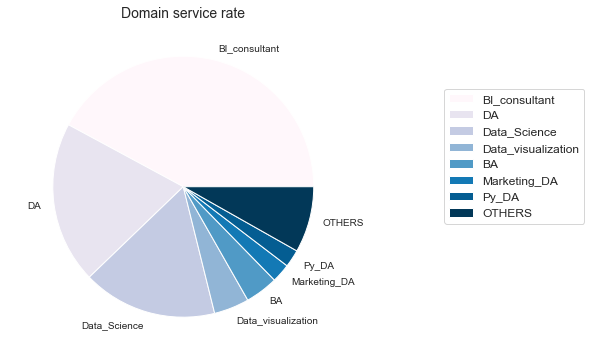

In [5]:
#pie chart 

sns.set_style("whitegrid")
df = cohort.groupby('Domain').agg({'Service_price': 'sum'}).sort_values('Service_price', ascending=False)

OTHERS = df.iloc[7:].sum()
df.drop(df.iloc[7:].index.tolist(), inplace=True)
df.loc['OTHERS'] = OTHERS

ax = df.plot.pie(y='Service_price', figsize=(6, 6), colormap='PuBu')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.3, 0.8), loc=2, borderaxespad=0., fontsize=12)
plt.ylabel(' ')
plt.title('Domain service rate', fontsize=14)
plt.show()

What is the intensity of BI consultant in the countries

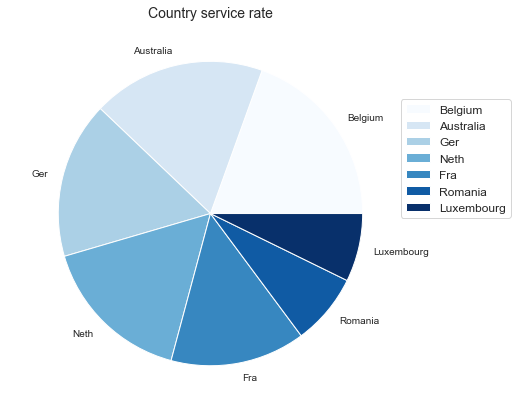

In [6]:
sns.set_style("whitegrid")
df = cohort.groupby('Country ').agg({'Service_price': 'sum'}).sort_values('Service_price', ascending=False)


ax = df.plot.pie(y='Service_price', figsize=(7, 7), colormap='Blues')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.0, 0.8), loc=2, borderaxespad=0., fontsize=12)
plt.ylabel(' ')
plt.title('Country service rate', fontsize=14)
plt.show()

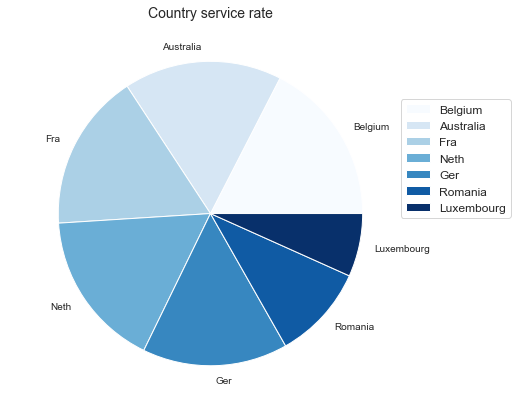

In [9]:
sns.set_style("whitegrid")
df = cohort.groupby('Country ').agg({'Domain': 'count'}).sort_values('Domain', ascending=False)


ax = df.plot.pie(y='Domain', figsize=(7, 7), colormap='Blues')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.0, 0.8), loc=2, borderaxespad=0., fontsize=12)
plt.ylabel(' ')
plt.title('Country service rate', fontsize=14)
plt.show()